<h1 align="center">MOVIE RECOMMENDATION SYSTEM<br>using MovieLens 1M dataset</h1>

<h2 align="center">-----PROBLEM FORMULATION-----</h2>

**Almost everyone today uses technology to stream movies and television shows. While figuring out what to stream next can be daunting, recommendations are often made based on a viewer’s history and preferences. A recommender system makes it easier for the user to decide what to watch next depending on their previous records.**  

**Recommender systems are among the most popular applications of data science today. They are used to predict the "rating" or "preference" that a user would give to an item. Almost every major tech company has applied them in some form. Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow.**

**For some companies like Netflix, Amazon Prime, Hulu, and Hotstar, the business model and its success revolves around the potency of their recommendations. Netflix even offered a million dollars in 2009 to anyone who could improve its system by 10%.**  
<center>
<img src="https://s3.amazonaws.com/re-work-production/post_images/524/netflixf/original.png?1519061395" alt="recommender example. link: https://s3.amazonaws.com/re-work-production/post_images/524/netflixf/original.png?1519061395" />
</center>

<h3 align="center">For my final project, I have tried to make a simple recommender using two methods</h3>

<h2 align="center"><br>-----ALGORITHMS FOLLOWED-----</h2>

- **Content Filtering:** Recommendations depend on item characteristics.
- **Collaborative Filtering:** Recommendations depend on user-item ratings.
    * Pearson Product Moment Correlation Coefficient (PMCC)
    * Correlation matrix
<center>    
<img src="https://miro.medium.com/max/700/0*wJ1hfDhXNYJbk8Aj" alt="Different Filtering methods. link: https://miro.medium.com/max/700/0*wJ1hfDhXNYJbk8Aj" />
</center>

<h2 align="center"><br>-----DATASETS-----</h2>

<h3 align="center">(The folder containing the dataset is included in the submission forder)</h3>

**The Movielens dataset contains a set of movie ratings from the MovieLens website, a movie recommendation service. This dataset was collected and maintained by GroupLens, a research group at the University of Minnesota. There are 5 versions included: "25m", "latest-small", "100k", "1m", "20m". In all datasets, the movies data and ratings data are joined on "movieId".**  

**_DATASET USED_ : &nbsp; MovieLens 1M stable benchmark dataset. Released 2/2003. These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000. Each user has rated at least 20 movies. Ratings are in whole-star increments.**  

**_DATASET CITATION_ : &nbsp; F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History
and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4,
Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872**  

<h3>DETAILS ABOUT THE DATASET</h3>

**The folder contains three dat files-  
movies.dat &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MovieID::Title::Genres  
ratings.dat &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;UserID::MovieID::Rating::Timestamp  
users.dat &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;UserID::Gender::Age::Occupation::Zip-code  
  I have only used the movies.dat and ratings.dat for my models.**  
 
 <h3>RATINGS FILE DESCRIPTION</h3>

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

<h3>MOVIES FILE DESCRIPTION</h3>

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

<h2 align="center"><br>-----IMPLEMENTATION, RESULTS AND DISCUSSION-----</h2>

### Importing libraries

In [1]:
import pandas as pd  
import numpy as np  

<h3 align="center">CONTENT FILTERING</h3>

> This method suggests similar items based on a particular item. This system uses item metadata, here, the genre, to make these recommendations. The general idea behind these recommender systems is that if a person likes a particular item, he or she will also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata. 

### Data Preprocessing

In [2]:
#                          Data set is in the form:
#                          1::Toy Story (1995)::Animation|Children's|Comedy 

movies_df = pd.read_table('ml-1m/movies.dat', header=None, sep='::', names=['movie_id', 'movie_title', 'movie_genre'])

<ipython-input-2-86169cd86ea0>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_table('ml-1m/movies.dat', header=None, sep='::', names=['movie_id', 'movie_title', 'movie_genre'])


In [3]:
# viewing the first 5 lines

movies_df.head()

,movie_id,movie_title,movie_genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


> **In order to be able to work with the movie_genre column, we need to transform it to "dummy variables".<br>  
This is a way to convert a categorical variable (e.g. Animation, Comedy, Romance...), into multiple columns (one column named Action, one named Comedy, etc).<br>  
For each movie, these dummy columns will have a value of 0 except for those genres the movie has.**

In [4]:
# converting the movie genres to a set of dummy variables 

movies_df = pd.concat([movies_df, movies_df.movie_genre.str.get_dummies(sep='|')], axis=1)  
movies_df.head()  

,movie_id,movie_title,movie_genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
''' So for example, the movie with an id of 1 Toy Story, belongs to the genres Animation, Children's and Comedy. 
     Thus the columns Animation, Children's and Comedy have a value of 1. '''

movie_categories = movies_df.columns[3:]  
movies_df.iloc[0] 

movie_id                                 1
movie_title               Toy Story (1995)
movie_genre    Animation|Children's|Comedy
Action                                   0
Adventure                                0
Animation                                1
Children's                               1
Comedy                                   1
Crime                                    0
Documentary                              0
Drama                                    0
Fantasy                                  0
Film-Noir                                0
Horror                                   0
Musical                                  0
Mystery                                  0
Romance                                  0
Sci-Fi                                   0
Thriller                                 0
War                                      0
Western                                  0
Name: 0, dtype: object

### Working with the vectors (computing score)

   > - **Here, items (in this example movies) are mapped to a set of features (genres).**
    - **To recommend a user an item, first that user has to provide his/her preferences regarding those features.**
    - **So in this example, the user has to tell the system how much does he or she like each movie genre.**
    - **Right now we have all the movies mapped into genres. We just need to create a user and map that user into those genres.**

In [6]:
# creating an user with preference for action, adventure, sci-fi and fantasy movies.

from collections import OrderedDict

user_preferences = OrderedDict(zip(movie_categories, []))

user_preferences['Action'] = 5  
user_preferences['Adventure'] = 5  
user_preferences['Animation'] = 1  
user_preferences["Children's"] = 1  
user_preferences["Comedy"] = 3  
user_preferences['Crime'] = 2  
user_preferences['Documentary'] = 1  
user_preferences['Drama'] = 3  
user_preferences['Fantasy'] = 5  
user_preferences['Film-Noir'] = 4  
user_preferences['Horror'] = 1  
user_preferences['Musical'] = 1  
user_preferences['Mystery'] = 4  
user_preferences['Romance'] = 1  
user_preferences['Sci-Fi'] = 5  
user_preferences['War'] = 3  
user_preferences['Thriller'] = 4  
user_preferences['Western'] =1  

> Once we have users with their movie genre preferences and the movies mapped into genres, to compute the **score** of a movie for a specific user, we just need to calculate the **dot product** of that **movie genre vector** with that **user preferences vector**.

In [7]:
# using np.dot instead of writing our own dot product function might be easier

def dot_product(vector_1, vector_2):  
    return sum([ i*j for i,j in zip(vector_1, vector_2)])

def get_movie_score(movie_features, user_preferences):  
    return dot_product(movie_features, user_preferences)

In [8]:
# Taking Toy Story as an example
# Taking a genre that the user does not like to see it's score

toy_story_features = movies_df.iloc[0][movie_categories]  
toy_story_features  

Action         0
Adventure      0
Animation      1
Children's     1
Comedy         1
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
Name: 0, dtype: object

In [9]:
# Calculating score of Toy Story for sample user

toy_story_user_predicted_score = dot_product(toy_story_features, user_preferences.values())  
toy_story_user_predicted_score  

5

> **Since we don't know whether 5 is a high or a low number, we need to compare it with the score of a movie that we know is more suited to the user's taste (adventure, action, sci-fi ). Hence, I have chosen Star Trek.**

In [10]:
# looking for the movie in the data set

movies_df[movies_df.movie_title.str.contains('Star Trek: The Motion Picture')]

,movie_id,movie_title,movie_genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1350,1371,Star Trek: The Motion Picture (1979),Action|Adventure|Sci-Fi,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# showing the features for Star Trek

star_trek_id = 1371  
star_trek_features = movies_df[movies_df.movie_id==star_trek_id][movie_categories]  
star_trek_features.T  

,1350
Action,1
Adventure,1
Animation,0
Children's,0
Comedy,0
Crime,0
Documentary,0
Drama,0
Fantasy,0
Film-Noir,0


In [12]:
# Calculating score

star_trek_user_predicted_score = dot_product(star_trek_features.values[0], user_preferences.values())  
star_trek_user_predicted_score  

15

> **It is observed that Star Trek gets an score of 15 vs a 5 for Toy Story. So Star Trek would be recommended before Toy Story. Which makes sense, given this user's preferences are skewed towards action packed movies. 
<br> 
Similarly, just like calculating the score for one movie, providing movie recommendations for the user includes calculating the score for all the movies and returning those with the highest scores.**

In [13]:
def get_movie_recommendations(user_preferences, no_of_recommendations):  
    # add a column to the movies_df dataset with the calculated score for each movie for the given user
    movies_df['score'] = movies_df[movie_categories].apply(get_movie_score, 
                                                           args=([user_preferences.values()]), axis=1)
    # sort by score in descending order
    return movies_df.sort_values(by=['score'], ascending=False)['movie_title'][:no_of_recommendations]


get_movie_recommendations(user_preferences, 20)  

1178    Star Wars: Episode V - The Empire Strikes Back...
2253                                       Soldier (1998)
2559     Star Wars: Episode I - The Phantom Menace (1999)
2036                                          Tron (1982)
1192    Star Wars: Episode VI - Return of the Jedi (1983)
257             Star Wars: Episode IV - A New Hope (1977)
1197                              Army of Darkness (1993)
158                                          Congo (1995)
1630                             Starship Troopers (1997)
1985                      Honey, I Shrunk the Kids (1989)
1187                  Transformers: The Movie, The (1986)
1111                                    Abyss, The (1989)
1113                          Escape from New York (1981)
1848                                    Armageddon (1998)
2847                                  Total Recall (1990)
838                               Escape from L.A. (1996)
1550                                         Spawn (1997)
1539          

> **So the system recommends heavy action, adventure, thriller and sci-fi movies. The recommendations align with the user's preferences.**

**DISADVANTAGES OF CONTENT FILTERING:**

* Need to map each item into the feature space. That means that any time a new item gets added, someone has to manually categorize that item.
* Recommendations are limited in scope. This means items can't be categorized in new features.

<h3 align="center">COLLABORATIVE FILTERING</h3>

> Collaborative Filtering is a technique whereby the system tries to find the most similar users and recommend products based on other similar users. Here, I use the existing user-item scores to predict the missing ones.
> 
>> The assumption is that users get value from recommendations based on other users with similar tastes. 
>><center>
<img src="https://miro.medium.com/max/248/0*WyT4h2YFxQMdOnoY.png" alt="Collaborative filtering image. link: https://miro.medium.com/max/248/0*WyT4h2YFxQMdOnoY.png" style="height: 200px; width:200px;" />
</center>

### Data Preprocessing

In [14]:
#                         Data set is in the form:
#                         1::1193::5::978300760  

ratings_df = pd.read_table('ml-1m/ratings.dat', header=None, sep='::', names=['user_id', 'movie_id', 'rating', 'timestamp'])

# dropping unnecessary column timestamp
del ratings_df['timestamp']

# replacing movie_id with movie_title for legibility
ratings_df = pd.merge(ratings_df, movies_df, on='movie_id')[['user_id', 'movie_title', 'movie_id','rating']]

ratings_df.head()  

<ipython-input-14-511a0f6fa85c>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_df = pd.read_table('ml-1m/ratings.dat', header=None, sep='::', names=['user_id', 'movie_id', 'rating', 'timestamp'])


,user_id,movie_title,movie_id,rating
0,1,One Flew Over the Cuckoo's Nest (1975),1193,5
1,2,One Flew Over the Cuckoo's Nest (1975),1193,5
2,12,One Flew Over the Cuckoo's Nest (1975),1193,4
3,15,One Flew Over the Cuckoo's Nest (1975),1193,4
4,17,One Flew Over the Cuckoo's Nest (1975),1193,5


In [15]:
# The dataset is a matrix of users and movie ratings
# so we convert the ratings_df to a matrix with a user per row and a movie per column.

ratings_mtx_df = ratings_df.pivot_table(values='rating', index='user_id', columns='movie_title')  
ratings_mtx_df.fillna(0, inplace=True)

movie_index = ratings_mtx_df.columns

ratings_mtx_df.head() 

# We have a matrix of 6040 users and 3706 movies.
# Showing only first 5 rows

movie_title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding correlation using Pearson Product Moment Correlation Coefficient

> To compute similarities between movies, one way is to find the **correlation** between movies and then use that correlation to find similar movies to those the users have liked.
>
>>An easy way of doing this is in python is by using the **numpy.corrcoef** function, that calculates the **Pearson Product Moment Correlation Coefficient (PMCC)** between each item pair.<br><br>the PMCC has a value between **-1 and 1** that measures the correlation (positive or negative) between two variables.The relationship between the correlation coefficient matrix, R, and the covariance matrix, C, is
![equation](http://www.sciweavers.org/tex2img.php?eq=R_i_j%20%3D%20%5Cfrac%7BC_i_j%7D%7B%5Csqrt%7B%7BC_i_i%2AC_j_j%7D%7D%0A&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0)   
<br><br>A **correlation matrix** is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between **two variables.** <br><br>A **correlation matrix** is a matrix of **m x m** shape, where element **Mij** represents the correlation between **item i and item j**.

In [16]:
corr_matrix = np.corrcoef(ratings_mtx_df.T)    

> **Note:** We use the transposed ratings matrix to calculate the correlation matrix so it gives back the correlation between movies (rows). If we used the ratings matrix without transposing it, np.corrcoef would return the correlation between users.

In [17]:
corr_matrix

array([[ 1.        ,  0.06533759,  0.03080517, ..., -0.00133208,
         0.11657371,  0.0092426 ],
       [ 0.06533759,  1.        ,  0.10737359, ..., -0.00185192,
        -0.00582469,  0.05469931],
       [ 0.03080517,  0.10737359,  1.        , ..., -0.00157109,
         0.04284183,  0.0434834 ],
       ...,
       [-0.00133208, -0.00185192, -0.00157109, ...,  1.        ,
        -0.00102097,  0.0425339 ],
       [ 0.11657371, -0.00582469,  0.04284183, ..., -0.00102097,
         1.        ,  0.03148125],
       [ 0.0092426 ,  0.05469931,  0.0434834 , ...,  0.0425339 ,
         0.03148125,  1.        ]])

### Plotting the correlation matrix

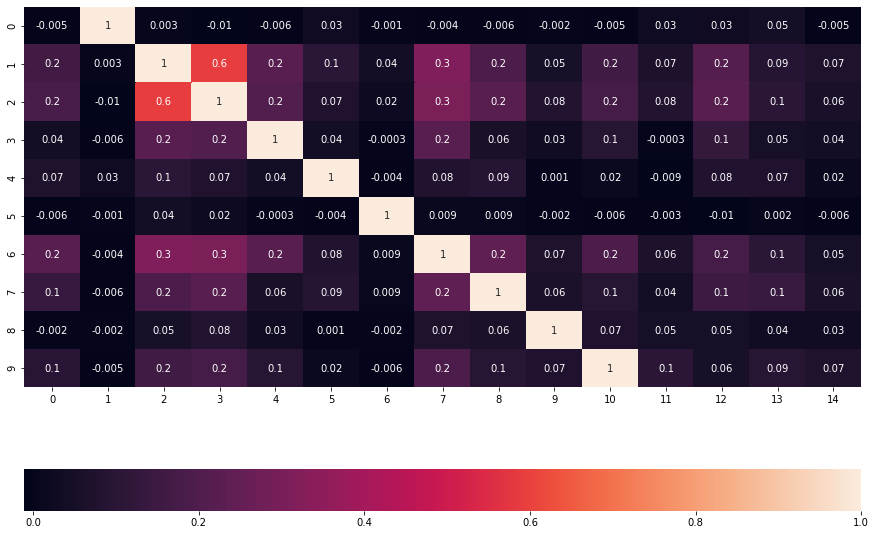

In [18]:
# since the dataset is huge, we can take a portion of it to plot. 
# random section (from row 50 to row 60 and colum 49 to column 64) and annotation upto 1 significant figure
import seaborn as sn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
sn.heatmap(corr_matrix[50:60,49:64], annot = True, fmt='.1g', cbar_kws= {'orientation': 'horizontal'})
plt.show()

In [19]:
corr_matrix.shape

(3706, 3706)

>  **If we want to find similar movies to a specific movie, we return those movies that have a high correlation coefficent with that one.**

In [20]:
favoured_movie_title = 'Toy Story (1995)'

favoured_movie_index = list(movie_index).index(favoured_movie_title)

P = corr_matrix[favoured_movie_index]


#only return those movies with a high correlation with Toy Story
list(movie_index[(P>0.4) & (P<1.0)])  

['Aladdin (1992)',
 "Bug's Life, A (1998)",
 'Groundhog Day (1993)',
 'Lion King, The (1994)',
 'Toy Story (1995)',
 'Toy Story 2 (1999)']

> **Now to provide recommendations to a user, we take the list of movies that user has rated. Then we sum the correlations of those movies with all the other ones and return a list of those movies sorted by their total correlation with the user.**

In [21]:
#Returns correlation vector for a movie

def get_movie_similarity(movie_title):  
    movie_idx = list(movie_index).index(movie_title)
    return corr_matrix[movie_idx]

 # given a set of movies, it returns all the movies sorted by their correlation with the user
    
def get_movie_recommendations(user_movies):  
    movie_similarities = np.zeros(corr_matrix.shape[0])
    for movie_id in user_movies:
        movie_similarities = movie_similarities + get_movie_similarity(movie_id)
        
    similarities_df = pd.DataFrame({
        'movie_title': movie_index,
        'sum_similarity': movie_similarities
        })
    
    similarities_df = similarities_df[~(similarities_df.movie_title.isin(user_movies))]
    similarities_df = similarities_df.sort_values(by=['sum_similarity'], ascending=False)
    return similarities_df

> **To check if it's working, let's select a user with a preference for kid's movies, and some thriller movies.**

In [22]:
sample_user = 112  
ratings_df[ratings_df.user_id==sample_user].sort_values(by=['rating'], ascending=False)  

,user_id,movie_title,movie_id,rating
4239,112,"Bug's Life, A (1998)",2355,5
440990,112,Pinocchio (1940),596,5
451967,112,Lady and the Tramp (1955),2080,5
452833,112,Fantasia (1940),1282,5
455536,112,Peter Pan (1953),2087,5
460155,112,Robin Hood (1973),3034,5
532515,112,Blade Runner (1982),541,5
623957,112,"Iron Giant, The (1999)",2761,5
625991,112,"Grifters, The (1990)",1179,5
630791,112,"Big Sleep, The (1946)",1284,5


In [23]:
# Now we provide movie recommendations to the sample user 
# by using their list of rated movies as an input.

sample_user_movies = ratings_df[ratings_df.user_id==sample_user].movie_title.tolist()  
recommendations = get_movie_recommendations(sample_user_movies)

# getting the top 20 recommended movies
recommendations.movie_title.head(20)  

1002                                    Dumbo (1941)
277                                     Bambi (1942)
1948                      Little Mermaid, The (1989)
2098                             Mary Poppins (1964)
647                           Charlotte's Web (1973)
3656                        Wizard of Oz, The (1939)
3250                  Sword in the Stone, The (1963)
188                                      Antz (1998)
3687                         Yellow Submarine (1968)
3635    Willy Wonka and the Chocolate Factory (1971)
2264                        Muppet Movie, The (1979)
2771                            Rescuers, The (1977)
3518                                  Vertigo (1958)
2738                              Rear Window (1954)
1611             Hunchback of Notre Dame, The (1996)
2077                Manchurian Candidate, The (1962)
2676                                   Psycho (1960)
3693                       Young Frankenstein (1974)
204                           Aristocats, The 

> **So we see that the system recommends mostly kid's movies and some thriller movies.**

**DISADVANTAGES OF COLLABORATIVE FILTERING:**

* Collaborative filtering cannot recommend items for a new user until he/she has reviewed some items. This problem is called the Cold Start Issue.
* Traditionally, data sparsity is seen as a key disadvantage of user-based CF. It is often assumed that data sparsity may cause small number of co-rated items or no such ones between two users, resulting in unreliable or unavailable similarity information, and further incurring poor recommendation quality. 

**PROBABLE SOLUTION**
>**One way recommender systems overcome this issue is by using a hybrid Content + Colaborative Filtering. That is, using colaborative filtering as well as content filtering when necessary.**

<h2 align="center"><br>-----REFERENCES-----</h2>

* [Documentation for numpy.corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)
* [Pearson correlation coefficient](https://www.sciencedirect.com/topics/social-sciences/pearson-correlation-coefficient)
* [Stackabuse-Useful during Preprocessing](https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/)
* [Seaborn Heatmap](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07)
* [Blog-Useful during preparing model](http://blog.manugarri.com/a-short-introduction-to-recommendation-systems/)
* [Wiki-Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)